# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **E-commerce Shipping Time Prediction Engine** |

# II. Notebook Target Definition

_Insert Text Here_

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
X = pd.read_pickle('../../data/processed/X.pkl')
y = pd.read_pickle('../../data/processed/y.pkl')

In [3]:
X.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,1,D,Flight,4,2,177,3,low,F,44,1233
1,2,F,Flight,4,5,216,2,low,M,59,3088
2,3,A,Flight,2,2,183,4,low,M,48,3374
3,4,B,Flight,3,3,176,4,medium,M,10,1177
4,5,C,Flight,2,2,184,3,medium,F,46,2484


In [4]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

# IV. Exploratory Data Analysis

## IV.A. Data Shape Inspection

In [5]:
X.shape, y.shape

((10999, 11), (10999,))

## IV.B. Data Information Inspection

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  object
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 945.4+ KB


In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10999 entries, 0 to 10998
Series name: Reached.on.Time_Y.N
Non-Null Count  Dtype
--------------  -----
10999 non-null  int64
dtypes: int64(1)
memory usage: 86.1 KB


## IV.C. Duplicated Values Inspection

In [8]:
X_duplicated = X[X.duplicated(subset="ID", keep=False)]
X_duplicated.shape

(0, 11)

In [9]:
X_duplicated

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms


## IV.D. Data Visualization

### IV.D.1. Target Label Proportion

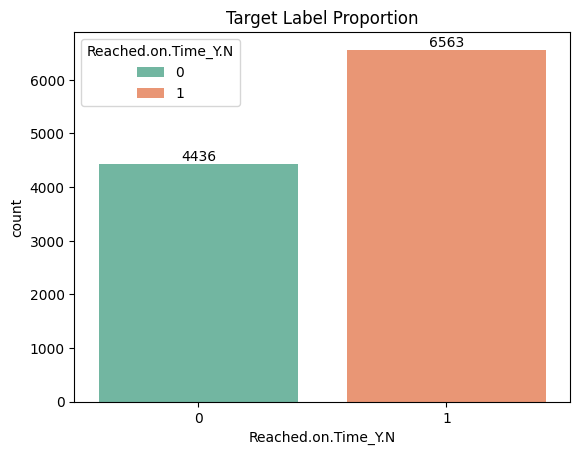

In [10]:
# Barplot
plt.title("Target Label Proportion")
y_proportion = sns.countplot(x=y, hue=y, palette='Set2')
for container in y_proportion.containers:
    y_proportion.bar_label(container)
plt.show()

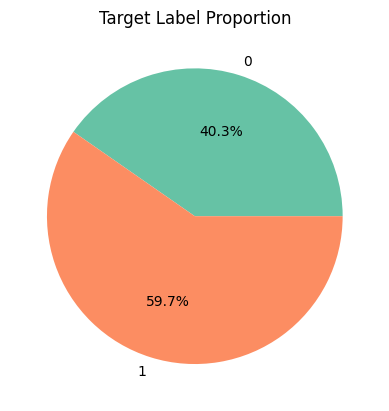

In [11]:
# Pie Chart
plt.title("Target Label Proportion")
palette = sns.color_palette('Set2', len(y.unique()))
colors = palette[:len(y.unique())]
plt.pie(x=y.value_counts().sort_index(),
        labels=y.value_counts().sort_index().index,
        colors=colors,
        autopct='%1.1f%%')
plt.show()

### IV.D.2. Warehouse Block Distribution

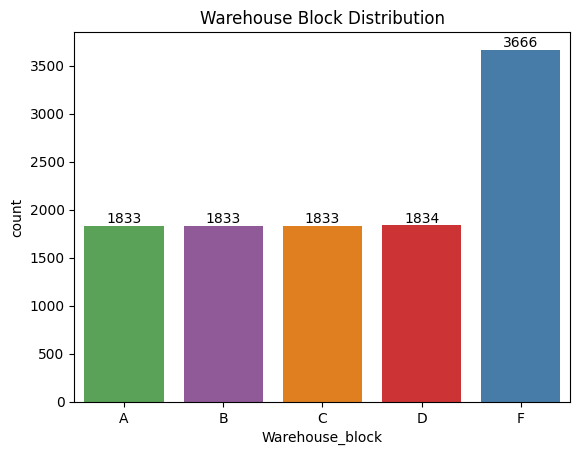

In [12]:
warehouse_order = ["A", "B", "C", "D", "F"]
plt.title("Warehouse Block Distribution")
warehouse_block_distribution = sns.countplot(
    data=X, x="Warehouse_block", hue="Warehouse_block", order=warehouse_order, palette='Set1', legend=False)
for container in warehouse_block_distribution.containers:
    warehouse_block_distribution.bar_label(container)
plt.show()

### IV.D.3. Mode of Shipment Distribution

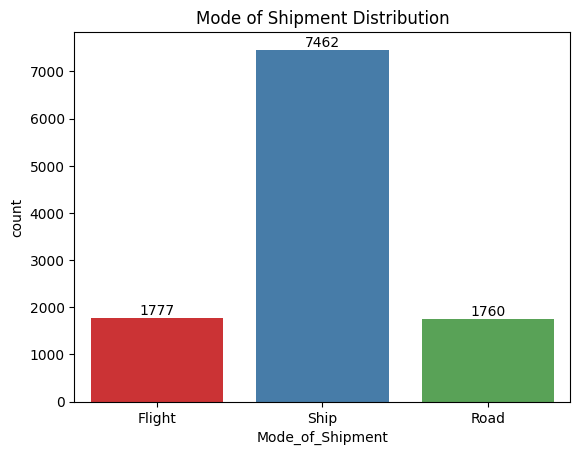

In [13]:
plt.title("Mode of Shipment Distribution")
mode_of_shipment_distribution = sns.countplot(
    data=X, x="Mode_of_Shipment", hue="Mode_of_Shipment", palette='Set1', legend=False)
for container in mode_of_shipment_distribution.containers:
    mode_of_shipment_distribution.bar_label(container)
plt.show()

### IV.D.4. Customer Care Calls Distribution

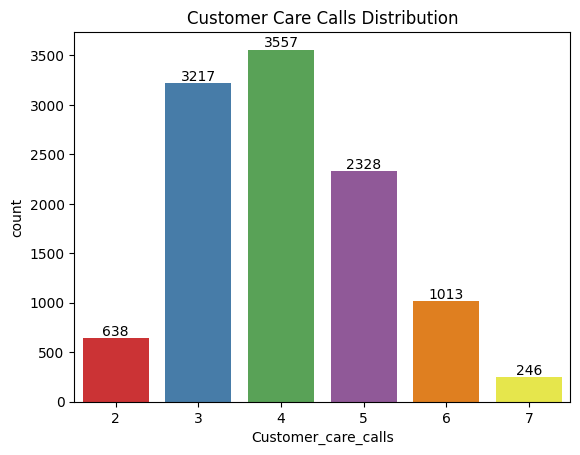

In [14]:
plt.title("Customer Care Calls Distribution")
customer_care_calls_distribution = sns.countplot(
    data=X, x="Customer_care_calls", hue="Customer_care_calls", palette='Set1', legend=False)
for container in customer_care_calls_distribution.containers:
    customer_care_calls_distribution.bar_label(container)
plt.show()

### IV.D.5. Customer Rating Distribution

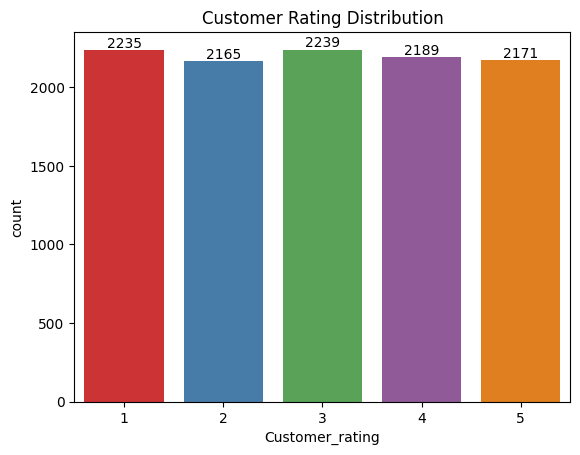

In [15]:
plt.title("Customer Rating Distribution")
customer_rating_distribution = sns.countplot(
    data=X, x="Customer_rating", hue="Customer_rating", palette='Set1', legend=False)
for container in customer_rating_distribution.containers:
    customer_rating_distribution.bar_label(container)
plt.show()

### IV.D.6. Distribution of Cost of the Product

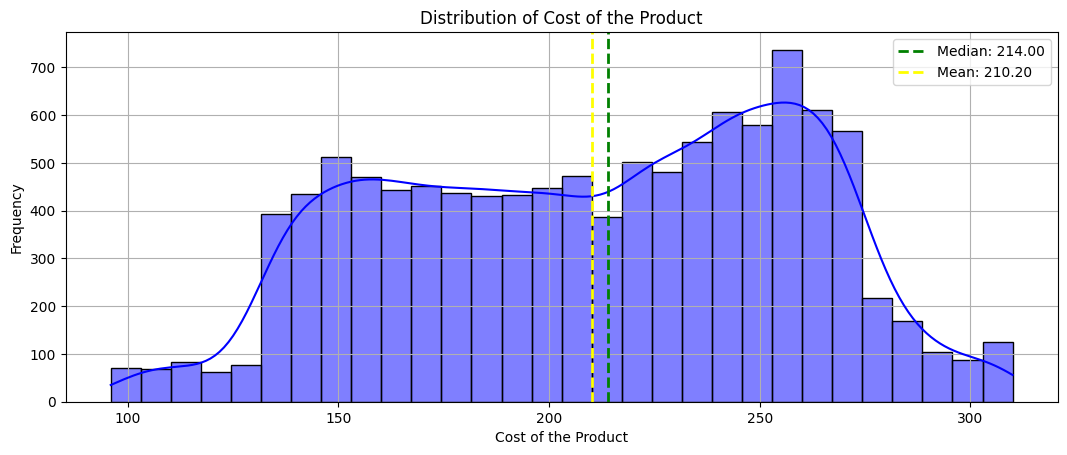

In [16]:
cost_median = X["Cost_of_the_Product"].median()
cost_mean = X["Cost_of_the_Product"].mean()
plt.figure(figsize=(12.8, 4.8))
plt.title("Distribution of Cost of the Product")
sns.histplot(X["Cost_of_the_Product"], kde=True, bins=30, color='blue')
plt.axvline(cost_median, color='green', linestyle='--', linewidth=2, label=f'Median: {cost_median:.2f}')
plt.axvline(cost_mean, color='yellow', linestyle='--', linewidth=2, label=f'Mean: {cost_mean:.2f}')
plt.xlabel("Cost of the Product")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### IV.D.7. Prior Purchases Distribution

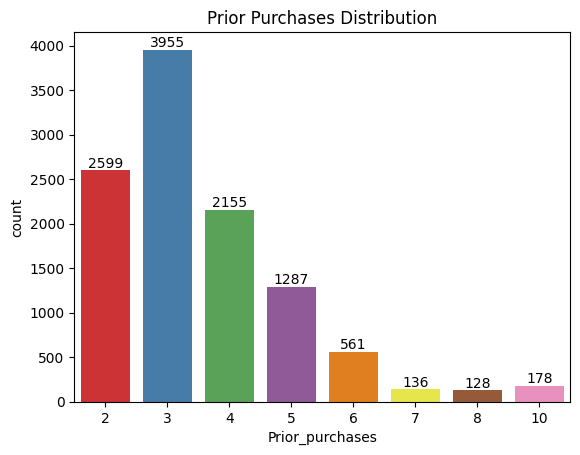

In [17]:
plt.title("Prior Purchases Distribution")
prior_purchases_distribution = sns.countplot(
    data=X, x="Prior_purchases", hue="Prior_purchases", palette='Set1', legend=False)
for container in prior_purchases_distribution.containers:
    prior_purchases_distribution.bar_label(container)
plt.show()

### IV.D.8. Product Importance Distribution

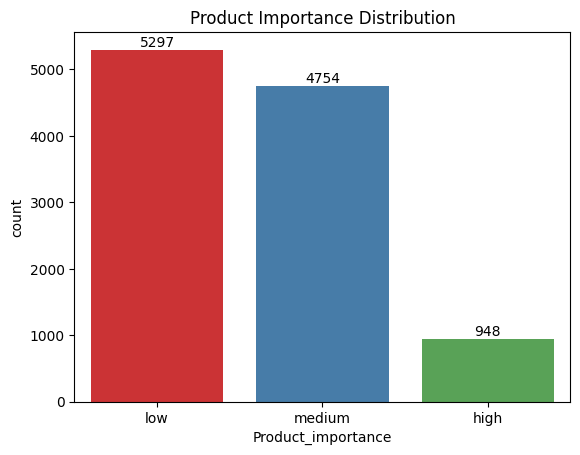

In [18]:
plt.title("Product Importance Distribution")
product_importance_distribution = sns.countplot(
    data=X, x="Product_importance", hue="Product_importance", palette='Set1', legend=False)
for container in product_importance_distribution.containers:
    product_importance_distribution.bar_label(container)
plt.show()

### IV.D.9. Gender Distribution

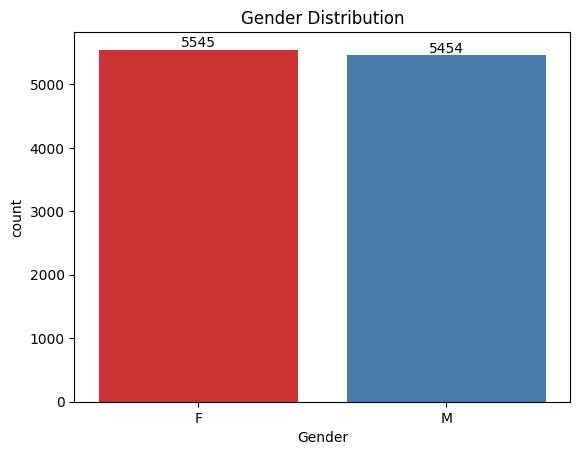

In [19]:
plt.title("Gender Distribution")
Gender_distribution = sns.countplot(
    data=X, x="Gender", hue="Gender", palette='Set1', legend=False)
for container in Gender_distribution.containers:
    Gender_distribution.bar_label(container)
plt.show()

### IV.D.10. Discount Offered Distribution

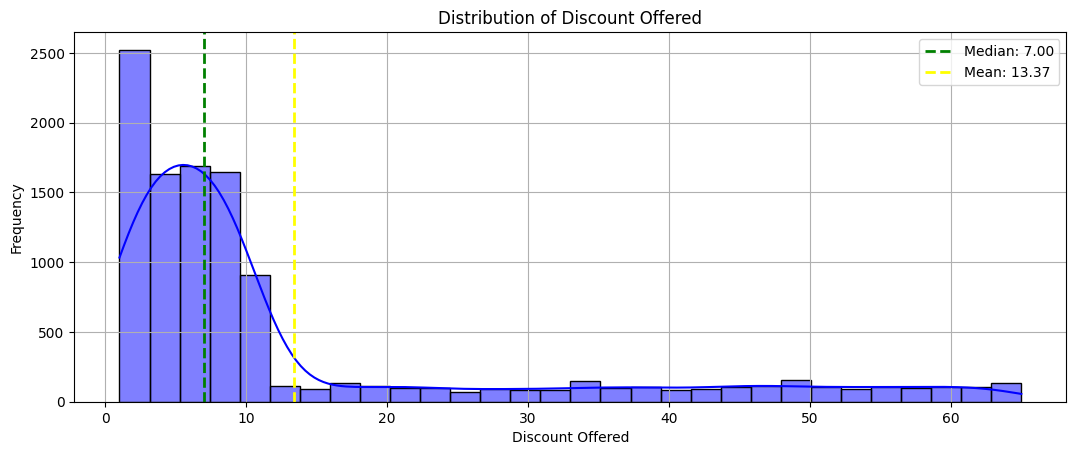

In [20]:
cost_median = X["Discount_offered"].median()
cost_mean = X["Discount_offered"].mean()
plt.figure(figsize=(12.8, 4.8))
plt.title("Distribution of Discount Offered")
sns.histplot(X["Discount_offered"], kde=True, bins=30, color='blue')
plt.axvline(cost_median, color='green', linestyle='--', linewidth=2, label=f'Median: {cost_median:.2f}')
plt.axvline(cost_mean, color='yellow', linestyle='--', linewidth=2, label=f'Mean: {cost_mean:.2f}')
plt.xlabel("Discount Offered")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

### IV.D.11. Weight Distribution

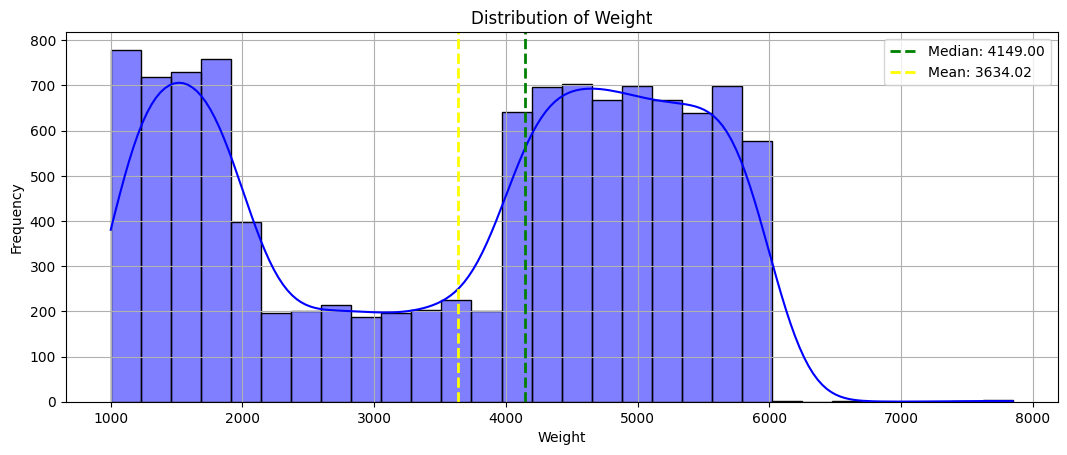

In [21]:
cost_median = X["Weight_in_gms"].median()
cost_mean = X["Weight_in_gms"].mean()
plt.figure(figsize=(12.8, 4.8))
plt.title("Distribution of Weight")
sns.histplot(X["Weight_in_gms"], kde=True, bins=30, color='blue')
plt.axvline(cost_median, color='green', linestyle='--', linewidth=2, label=f'Median: {cost_median:.2f}')
plt.axvline(cost_mean, color='yellow', linestyle='--', linewidth=2, label=f'Mean: {cost_mean:.2f}')
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

## IV.E. Statistical Analysis

### IV.E.1. Statistical Description

In [22]:
X.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


### IV.E.2. Skewness Analysis

In [23]:
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_skewness = X[numeric_columns].skew()
X_skewness = pd.DataFrame(
    {"variables": X_skewness.index, "skewness": X_skewness.values})

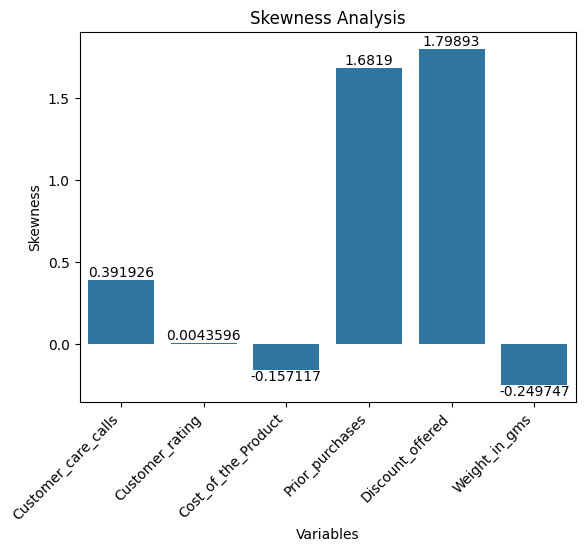

In [24]:
plt.title("Skewness Analysis")
skewness_plot = sns.barplot(x="variables", y="skewness", data=X_skewness)
for container in skewness_plot.containers:
    skewness_plot.bar_label(container)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Variables")
plt.ylabel("Skewness")
plt.show()

### IV.E.3. Chi-Squared Analysis

Analyze the independence or dependence between categorical variables and assess the goodness of fit of observed data to an expected distribution.

In [25]:
X_categorical = X.select_dtypes(include='object').copy()
X_numerical = X.select_dtypes(include='number').copy()
X_categorical.shape, X_numerical.shape

((10999, 5), (10999, 6))

In [26]:
X_categorical.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Product_importance',
       'Gender'],
      dtype='object')

In [27]:
X_numerical.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [28]:
chi2_list = []

for column in X_categorical.columns:
    cross_tab = pd.crosstab(y, X_categorical[column])
    chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(
        cross_tab)
    chi2_list.append({"variables": column, "p-value": round(p_value, 10)})

chi2_result = pd.DataFrame(chi2_list)
chi2_result = chi2_result.sort_values(by="p-value", ascending=True)
chi2_result.reset_index(drop=True, inplace=True)
chi2_result

,variables,p-value
0,Product_importance,0.002230
1,ID,0.495517
2,Gender,0.636703
3,Mode_of_Shipment,0.689549
4,Warehouse_block,0.895952


**Chi-Squared Analysis Results**:
- _Product_importance_: Significant with a p-value of 0.002230. Indicates a strong relationship with the target variable.
- _Gender_, _Mode_of_Shipment_, _Warehouse_block_: High p-values, no significant association with the target.
- _ID_: P-value of 0.495517, not significant and likely not useful for the model.

### IV.E.4. T-Statistics Analysis

Assess if there is a significant difference in means between two groups, such as comparing the mean scores of a continuous variable between two treatment groups.

In [29]:
X_numerical.fillna(X_numerical.mean(), inplace=True)

In [30]:
t_test_results = pd.DataFrame()

for variable in X_numerical.columns:
    group_0_values = X_numerical.loc[y == 0, variable]
    group_1_values = X_numerical.loc[y == 1, variable]
    t_statistic, p_value = ttest_ind(group_0_values, group_1_values)
    result_df = pd.DataFrame(
        {"variables": [variable], "t-statistic": [t_statistic], "p-value": [p_value]})
    t_test_results = pd.concat([t_test_results, result_df], ignore_index=True)

t_test_table = t_test_results.sort_values(by="t-statistic", ascending=False)
t_test_table.reset_index(drop=True, inplace=True)
t_test_table

,variables,t-statistic,p-value
0,Weight_in_gms,29.264343,2.354658e-181
1,Cost_of_the_Product,7.737818,1.099886e-14
2,Customer_care_calls,7.055172,1.827535e-12
3,Prior_purchases,5.830661,5.676140e-09
4,Customer_rating,-1.375822,1.689049e-01
5,Discount_offered,-45.374475,0.000000e+00


**T-Statistics Analysis Results**:
- _Weight_in_gms_, _Cost_of_the_Product_, _Customer_care_calls_, _Prior_purchases_, _Discount_offered_: Highly significant p-values (near 0), indicating a strong relationship with the target.
- _Customer_rating_: High p-value (0.169), indicating no significant effect.

### IV.E.5. ANOVA F Analysis

Compare more than two groups, such as comparing the mean scores of a continuous variable among different experimental conditions.

In [31]:
X_numerical.fillna(X_numerical.mean(), inplace=True)

In [32]:
f_statistic, p_values = f_classif(X_numerical, y)

anova_f_table = pd.DataFrame({"variables": X_numerical.columns,
                             "f-score": f_statistic, "p-value": p_values.round(decimals=10)})
anova_f_table.sort_values(by="f-score", ascending=False,
                          inplace=True, ignore_index=True)
anova_f_table

,variables,f-score,p-value
0,Discount_offered,2058.842985,0.000000e+00
1,Weight_in_gms,856.401798,0.000000e+00
2,Cost_of_the_Product,59.873829,0.000000e+00
3,Customer_care_calls,49.775450,0.000000e+00
4,Prior_purchases,33.996610,5.700000e-09
5,Customer_rating,1.892885,1.689049e-01


**ANOVA F-Analysis Results**:
- _Discount_offered_, _Weight_in_gms_: Extremely high F-scores with significant p-values, indicating strong predictive power.
- _Cost_of_the_Product_, _Customer_care_calls_, _Prior_purchases_: Significant p-values, though with lower F-scores compared to the top two features.
- _Customer_rating_: High p-value (0.169), suggesting it is not a strong predictor.

## IV.F. Correlation Analysis

In [33]:
corr_matrix = X_numerical.corr()

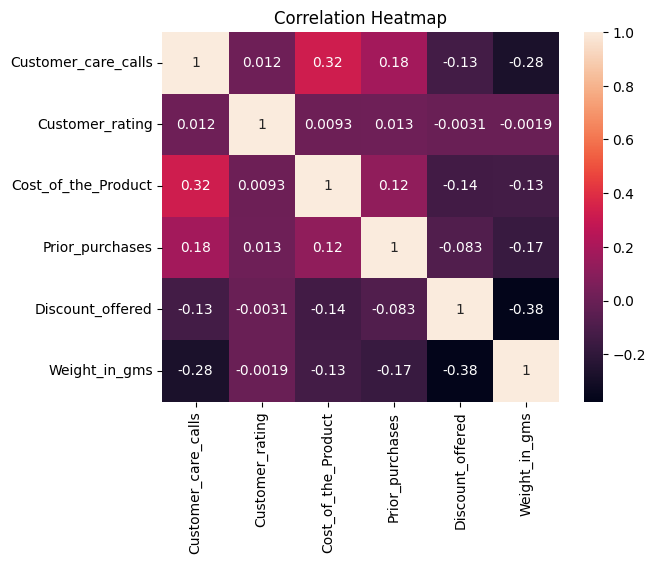

In [34]:
plt.title("Correlation Heatmap")
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

Based on statistical analysis and domain expertise, we have decided to drop the following columns:
- _ID_: Unique identifier, not predictive.
- _Customer_care_calls_: Not available at the start of shipment.
- _Customer_rating_: No significant predictive power (high p-values).
- _Gender_: No significant association with the target (high p-values).

# V. Preprocessing

## V.A. Unused Columns Removal

In [35]:
def unused_cols_removal(df, cols_to_remove):
    df.drop(columns=cols_to_remove, inplace=True)
    return df

In [36]:
cols_to_remove = ["ID", "Customer_care_calls", "Customer_rating", "Gender"]

In [37]:
unused_cols_removal(X, cols_to_remove)
X.shape

(10999, 7)

In [38]:
X.head()

,Warehouse_block,Mode_of_Shipment,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms
0,D,Flight,177,3,low,44,1233
1,F,Flight,216,2,low,59,3088
2,A,Flight,183,4,low,48,3374
3,B,Flight,176,4,medium,10,1177
4,C,Flight,184,3,medium,46,2484


## V.B. Data Splitting

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777, stratify=y)

In [40]:
X_train.shape, X_test.shape

((7699, 7), (3300, 7))

In [41]:
y_train.shape, y_test.shape

((7699,), (3300,))

In [42]:
y_train.value_counts()

Reached.on.Time_Y.N
1    4594
0    3105
Name: count, dtype: int64

In [43]:
y_test.value_counts()

Reached.on.Time_Y.N
1    1969
0    1331
Name: count, dtype: int64

## V.C. Export Data

In [44]:
X_train.to_pickle('../../data/processed/X_train.pkl')
X_test.to_pickle('../../data/processed/X_test.pkl')
y_train.to_pickle('../../data/processed/y_train.pkl')
y_test.to_pickle('../../data/processed/y_test.pkl')